<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## 1 Random numbers from other distributions

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Random numbers from the Normal distribution

In [2]:
# Your code here
# Normal distribution aka Gaussian distribution
# loc to specify mean
# scale to specify standard deviation

np.random.normal(loc=5, scale=2, size=10)

array([8.08658487, 8.63917873, 1.49944111, 6.53560856, 1.68030626,
       5.52300668, 3.43379839, 5.89947624, 4.59384724, 5.5705796 ])

### 1.2 Visualising the random numbers

Text(0, 0.5, 'Value of random number')

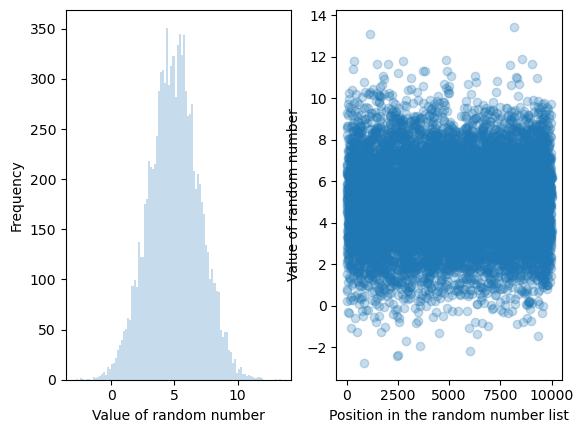

In [3]:
# Your code here

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.3 68%?

In [4]:
# Your code here
# check if normal random numbers satisfy 68% condition in normal distribution

n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')

% of points between 1 std.dev. from the mean: 67.38%


## 1 Brownian Motion in 1D

### 1.1 The scenario

In [5]:
# Your code here
# simuulate particle moving in 1D
# one unit to left or right randomly
# probability of going right as p
# probability of going left as q = 1-p

### 1.2 The simulation

In [6]:
# Your code here

def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x

In [7]:
import numpy.random as rnd

# to just use 'rnd' instead of np.random

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

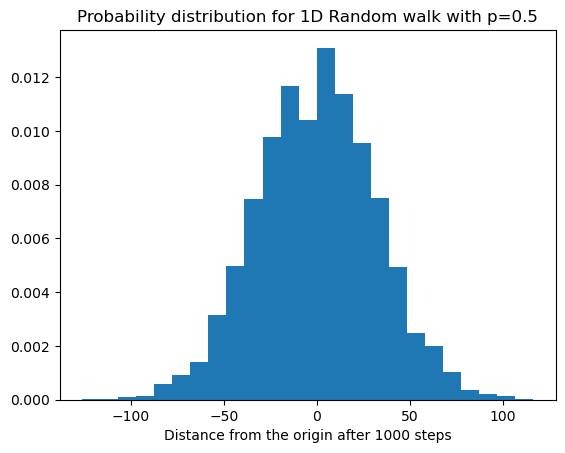

In [8]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

# density = True for matplotlib to normalise auc to 1

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.6')

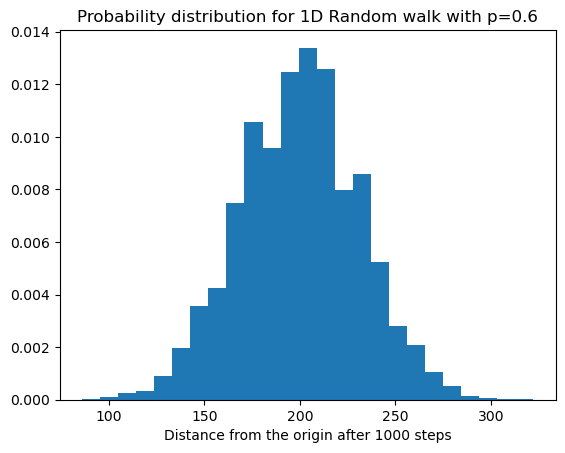

In [9]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

### 1.3 What does theory say?

In [10]:
# Your code here

# distribution should have mean N(p-q)
# standard deviation of sqr(4Npq)
# N is total number of steps
# actually binomial
# large sample size hence ~ gaussian

# function for normal distribution
def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output

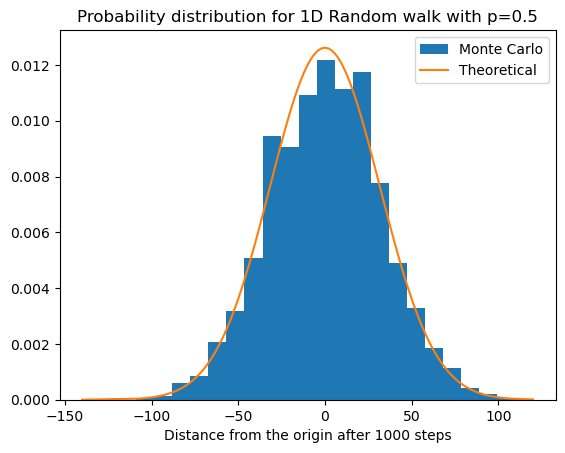

In [11]:
no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right = p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_right = .5
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

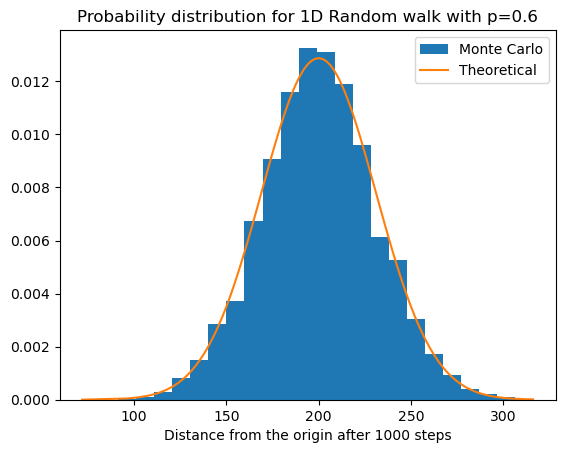

In [12]:
no_of_steps, p = 1_000, .6
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True, label = 'Monte Carlo')
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

prob_right = .6
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')
plt.legend(loc = 'upper right')

## 2 Estimating \(\pi\)

### 2.1 The method

In [13]:
# Your code here

### 2.2 A poor but intuitive solution

In [14]:
# Your code here
# throwing one grain at a time

N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi

3.15288

### 2.3 A better solution

In [15]:
# Your code here

N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)

3.14024

### 2.4 A smarter solution

In [16]:
# Your code here
# limiting to first quadrant of circle and related square
# same equation still
# range for x and y is [0, 1)

N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)

3.140956

## Exercise 1 :  Vital Stats of Random π

In [17]:
# Your solution here
# 1 and 2

def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / n)

run = [estimate_pi(n = 10000) for i in range(100)]
mean = np.mean(run)
std_d = np.std(run)

print(f'The mean is {mean:.3f} and the standard deviation is {std_d:.3f}.')

The mean is 3.141 and the standard deviation is 0.018.


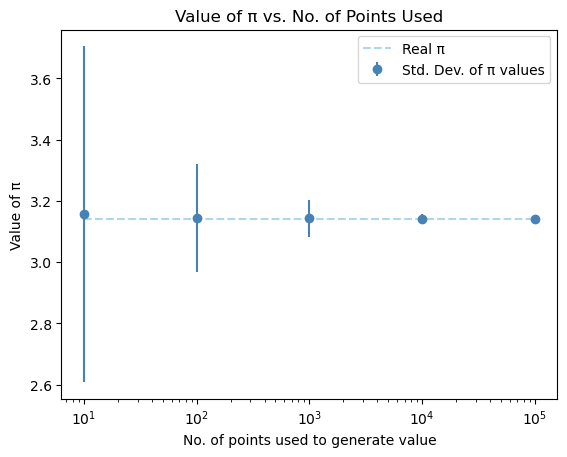

In [19]:
#for i in range(1, 6):
 #   a = 10 ** i
  #  n.append(a)

def estimate_pi(n):
    x=rnd.rand(n)
    y=rnd.rand(n)
    N_green=np.sum((x**2+y**2) <= 1)
    return 4 * (N_green / n)

n_list = [10 ** i for i in range(1, 6)]
mean_list = [] # storing the data into a list so later can plot
std_d_list = []
#print(n_list)

for n in n_list:
    run = [estimate_pi(n) for i in range(100)]
    mean = np.mean(run)
    std_d = np.std(run)
    mean_list.append(mean)   # appending into the lists
    std_d_list.append(std_d)
#print(mean_list)

#print(x)
    #y = [0, mean]
    #print(f'{run}') 
    #print(f'{mean}') 
    #print(f'{std_d}')
    #x_axis = [step]
# x_error, y_error = 
real_value_π = [np.pi for n in n_list]

#plt.plot(n_list, mean_list, color = 'steelblue', linestyle = 'dashed')
#plt.plot(n_list, std_d_list, color = 'steelblue', marker = 'o')
plt.plot(n_list, real_value_π, color = 'lightblue', linestyle = 'dashed', label = 'Real π')
plt.errorbar(n_list, mean_list, yerr = std_d_list, color = 'steelblue', label = 'Std. Dev. of π values', fmt = 'o')
plt.legend(loc = 'upper right')
plt.title('Value of π vs. No. of Points Used')
plt.xscale('log')
plt.xlabel('No. of points used to generate value')
plt.ylabel('Value of π')
plt.show()